<a href="https://colab.research.google.com/github/leejyy/Assignment/blob/master/decisionTree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

get the data


In [25]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/tree/kyphosis.csv')

In [26]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


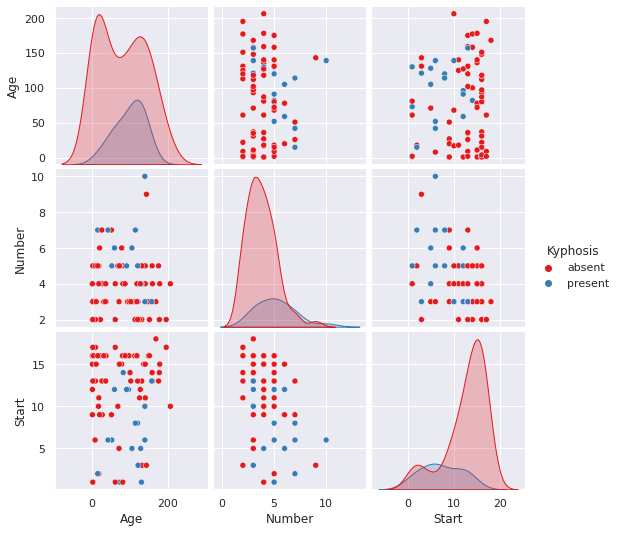

In [27]:
sns.pairplot(df, hue = 'Kyphosis', palette = 'Set1')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree=DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
predictions=dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.83      0.75      0.79        20
     present       0.29      0.40      0.33         5

    accuracy                           0.68        25
   macro avg       0.56      0.57      0.56        25
weighted avg       0.72      0.68      0.70        25



In [37]:
print(confusion_matrix(y_test,predictions))

[[15  5]
 [ 3  2]]


In [38]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

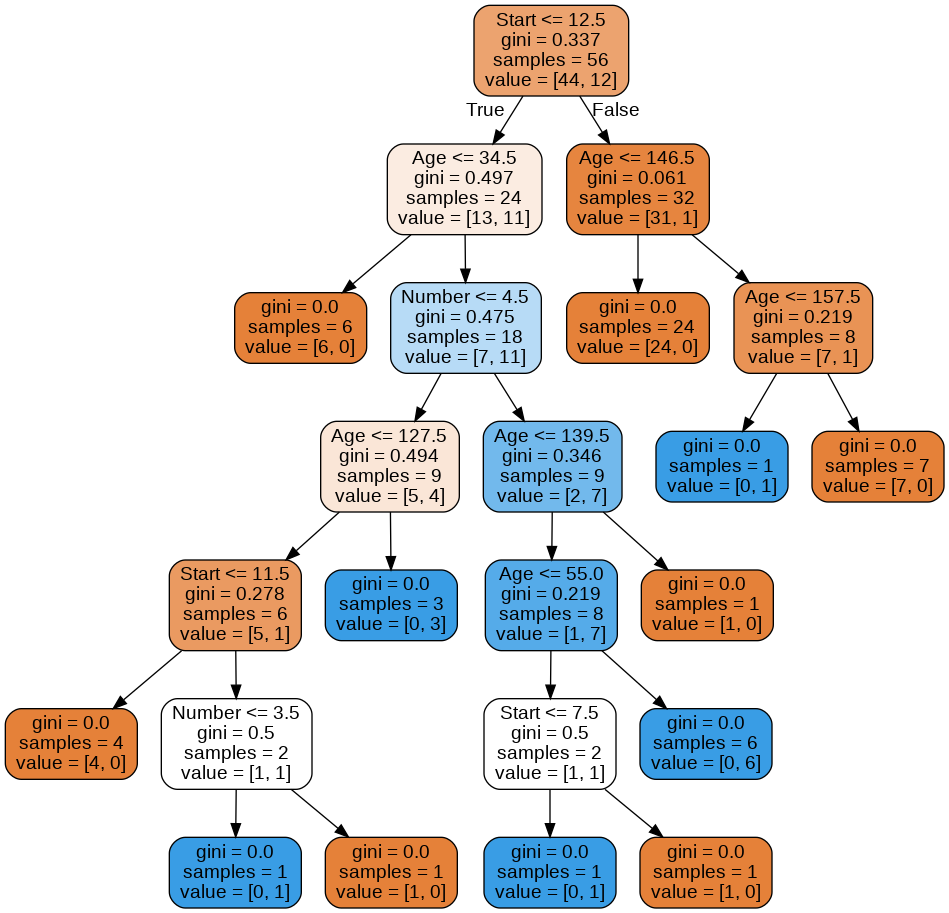

In [40]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
from sk